### Problem : 
**'carprices.csv'** contains car sale prices for 3 different models. First, plot data points on a regression plot to see if Linear Regression Model can be applied. Then build a model that can answer the following questions:
1. Predict price of a Mercedes Benz that is **4yrs old with mileage 45000.**
2. Predict price of a BMW X5 that is **7 years old with mileage 86000.**
3. What is the accuracy of your model ?

In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedes Benz C Class,67000,22000,6


#### Let us check using seaborn plots if we can train this model using Linear Regression

<Axes: xlabel='Mileage', ylabel='Sell Price($)'>

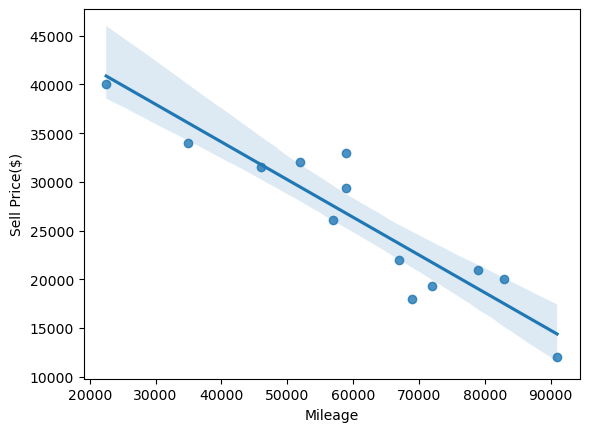

In [3]:
sns.regplot(data=df, x='Mileage', y='Sell Price($)')

<Axes: xlabel='Age(yrs)', ylabel='Sell Price($)'>

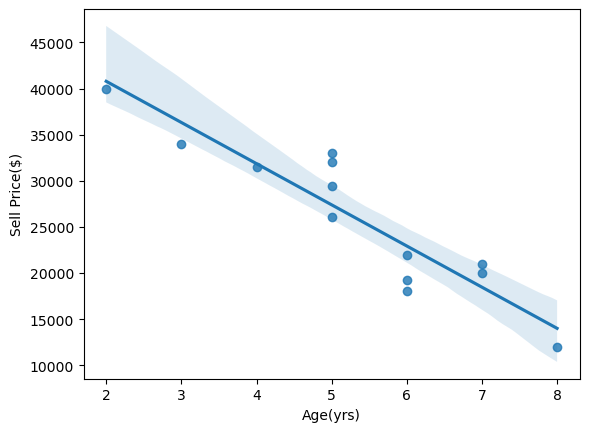

In [4]:
sns.regplot(data=df, x='Age(yrs)', y='Sell Price($)')

In [5]:
ohe = OneHotEncoder()
x = ohe.fit_transform(df[['Car Model']])
x

<13x3 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [6]:
x=pd.DataFrame(x.toarray())
x

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,1.0,0.0,0.0
9,0.0,0.0,1.0


In [7]:
#to avoid dummy variable trap
x = x.iloc[:,1:]
x

,1,2
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,1.0


In [8]:
x1 = df[['Mileage', 'Age(yrs)']]
x1

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [9]:
x1 = pd.concat([x1, x], axis="columns")
x1

,Mileage,Age(yrs),1,2
0,69000,6,1.0,0.0
1,35000,3,1.0,0.0
2,57000,5,1.0,0.0
3,22500,2,1.0,0.0
4,46000,4,1.0,0.0
5,59000,5,0.0,0.0
6,52000,5,0.0,0.0
7,72000,6,0.0,0.0
8,91000,8,0.0,0.0
9,67000,6,0.0,1.0


In [10]:
y = df['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [11]:
x1.columns = x1.columns.astype(str)

In [12]:
model = LinearRegression()
#train the model
model.fit(x1, y)

LinearRegression()

Parameters for predict are - [[ Mileage, Years, BMW, Mercedes, Audi ]]

In [17]:
model.predict([[45000, 4, 0, 1]]) #for Mercedes

array([36991.31721061])

In [14]:
model.predict([[86000, 7, 1, 0]]) #for BMW

array([11080.74313219])

In [15]:
model.score(x1,y)

0.9417050937281082